In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import pandas as pd
from math import pi
import numpy as np

In [13]:
# Initialize player names and respective statistics as multi-line strings
# Data from fbref.com 
# Data could have been scraped from fbref using bs4 but since I am lazy I decided to go this way 

player_name = "Patricia Guijarro"
text = f"""Statistic	Per 90	{player_name}
Non-Penalty Goals	0.47	99  
Non-Penalty xG	0.27	96  
Shots Total	2.09	80  
Assists	0.23	83  
xAG	0.28	99  
npxG + xAG	0.55	99  
Shot-Creating Actions	5.47	97  
Passes Attempted	85.12	99  
Pass Completion %	84.4%	91  
Progressive Passes	10.58	99  
Progressive Carries	1.28	77  
Successful Take-Ons	0.23	11  
Touches (Att Pen)	3.26	91  
Progressive Passes Rec	4.53	90  
Tackles	1.40	7  
Interceptions	0.81	9  
Blocks	2.33	99  
Clearances	0.23	1  
Aerials won	0.70	53"""

player_name1 = "Keira Walsh"
text1=f"""Statistic	Per 90	{player_name1}
Non-Penalty Goals	0.00	11  
Non-Penalty xG	0.01	1  
Shots Total	0.14	1  
Assists	0.14	71  
xAG	0.07	46  
npxG + xAG	0.07	9  
Shot-Creating Actions	4.08	90  
Passes Attempted	68.21	99  
Pass Completion %	92.6%	99  
Progressive Passes	7.62	97  
Progressive Carries	0.27	4  
Successful Take-Ons	0.82	66  
Touches (Att Pen)	0.14	1  
Progressive Passes Rec	1.23	27  
Tackles	1.36	7  
Interceptions	1.77	77  
Blocks	0.95	21  
Clearances	0.54	19  
Aerials won	0.54	40  
"""
# Parse multi-line strings to process the statistics line by line
lines = text.split('\n')
lines1 = text1.split('\n')
# Extract column names from the header line
header = lines[0].split()
# Initialize a dictionary to store the parsed data
data = {}
# Loop through each line (each representing a specific statistic)
for line,line1 in zip(lines[1:],lines1[1:]):
    # Extract and clean individual statistics and their values for each player
    # Store them in a structured dictionary
    values = line.split()
    statistic = ' '.join(values[:-2])
    value_str = values[-2]
    values1 =line1.split()
    value_str1 = values1[-2]
    if '%' in value_str:
        value_str = value_str.replace('%', '')
    if '%' in value_str1:
        value_str1 = value_str1.replace('%', '')
    value = float(value_str)
    value1 = float(value_str1)
    percentile = int(values[-1])
    percentile1 = int(values1[-1])
    data.setdefault(header[0], []).append(statistic)
    data.setdefault(header[1], []).append(value)
    data.setdefault("per1", []).append(value1)
    data.setdefault(player_name, []).append(percentile)
    data.setdefault(player_name1, []).append(percentile1)

print(data)

{'Statistic': ['Non-Penalty Goals', 'Non-Penalty xG', 'Shots Total', 'Assists', 'xAG', 'npxG + xAG', 'Shot-Creating Actions', 'Passes Attempted', 'Pass Completion %', 'Progressive Passes', 'Progressive Carries', 'Successful Take-Ons', 'Touches (Att Pen)', 'Progressive Passes Rec', 'Tackles', 'Interceptions', 'Blocks', 'Clearances', 'Aerials won'], 'Per': [0.47, 0.27, 2.09, 0.23, 0.28, 0.55, 5.47, 85.12, 84.4, 10.58, 1.28, 0.23, 3.26, 4.53, 1.4, 0.81, 2.33, 0.23, 0.7], 'per1': [0.0, 0.01, 0.14, 0.14, 0.07, 0.07, 4.08, 68.21, 92.6, 7.62, 0.27, 0.82, 0.14, 1.23, 1.36, 1.77, 0.95, 0.54, 0.54], 'Patricia Guijarro': [99, 96, 80, 83, 99, 99, 97, 99, 91, 99, 77, 11, 91, 90, 7, 9, 99, 1, 53], 'Keira Walsh': [11, 1, 1, 71, 46, 9, 90, 99, 99, 97, 4, 66, 1, 27, 7, 77, 21, 19, 40]}


In [14]:
# Convert the structured dictionary to a pandas DataFrame
df = pd.DataFrame(data)
# Filter out specific unwanted statistics from the DataFrame
df = df[~df['Statistic'].isin([
    'Non-Penalty Goals', 'Shots Total', 'Assists', 'npxG + xAG',
    'Passes Attempted', 'Pass Completion %'
])].reset_index(drop=True)
# Add a filler column to assist in visualizing the radar chart
df['Filler'] = 100

In [15]:
#Visualising the dataframe
df

,Statistic,Per,per1,Patricia Guijarro,Keira Walsh,Filler
0,Non-Penalty xG,0.27,0.01,96,1,100
1,xAG,0.28,0.07,99,46,100
2,Shot-Creating Actions,5.47,4.08,97,90,100
3,Progressive Passes,10.58,7.62,99,97,100
4,Progressive Carries,1.28,0.27,77,4,100
5,Successful Take-Ons,0.23,0.82,11,66,100
6,Touches (Att Pen),3.26,0.14,91,1,100
7,Progressive Passes Rec,4.53,1.23,90,27,100
8,Tackles,1.40,1.36,7,7,100
9,Interceptions,0.81,1.77,9,77,100


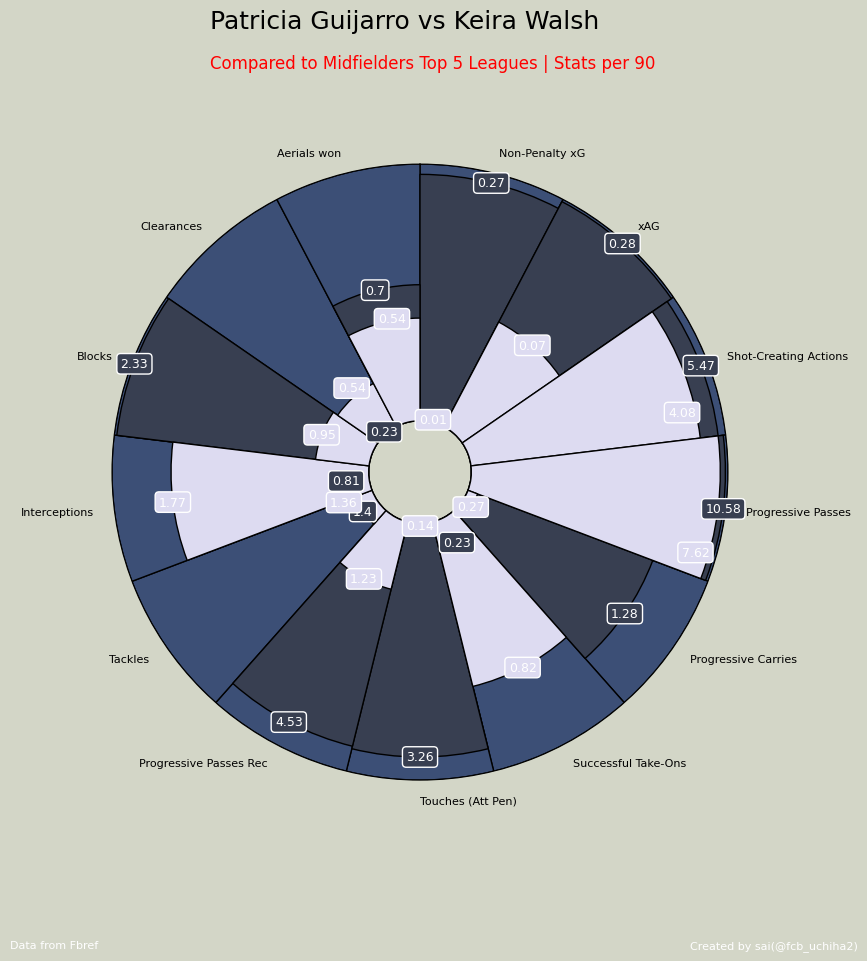

In [16]:
# Extract categories and their count for plotting radar chart
categories = df["Statistic"].to_list()
N = len(categories)
angles = np.linspace(0, 2 * pi, N, endpoint=False)
angles_mids = angles + (angles[1] / 2)
# Initialize the plot with relevant parameters
fig = plt.figure(figsize=(8,8))
# plot_extents = 0, 10, 0, 10
fig.set_facecolor("#d3d6c7")
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_facecolor("#d3d6c7")
plt.setp( ax.get_yticklabels(), visible=False)
plt.setp( ax.get_xticklabels(), visible=False)
ax.set_ylim(0, 120)

# Define colors for the bars
color0 = "#383F51"  # Color for values0
color1 = "#DDDBF1"   # Color for values1
hole_size =20

# Plot the bars in the radar chart for each player and fillers
values2 = df["Filler"].to_list()
ax.bar(angles_mids, values2, width=angles[1] - angles[0],
       color="#3C4F76", edgecolor='black', bottom =hole_size,linewidth=1, label="C")

values0 = df[player_name].to_list()
ax.bar(angles_mids, values0, width=angles[1] - angles[0],
       color=color0, edgecolor='black', bottom =hole_size,linewidth=1, label="A")

values1= df[player_name1].to_list()
ax.bar(angles_mids, values1, width=angles[1] - angles[0],
       color=color1, edgecolor='black',bottom =hole_size, linewidth=1, label="B")

# Add text annotations, titles and footers to the plot
for i in range(len(df)):
    ax.text(angles_mids[i], df[player_name][i] + hole_size, df['Per'][i], size=9, ha='center', va='center', color="w", bbox=dict(boxstyle='round', fc=color0, ec='w'))
for i in range(len(df)):
    if abs(df[player_name1][i]-df[player_name][i])< 20:
        ax.text(angles_mids[i]+0.15, df[player_name1][i] + hole_size, df["per1"][i], size=9, ha='right', va='center', color="w", bbox=dict(boxstyle='round', fc=color1, ec='w'))
    else:
        ax.text(angles_mids[i], df[player_name1][i] + hole_size, df["per1"][i], size=9, ha='center', va='center', color="w", bbox=dict(boxstyle='round', fc=color1, ec='w'))

for i in range(N):
    angle_rad = angles_mids[i]
    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 8
    elif angle_rad == pi:
        ha, distance_ax = "center", 8
    else:
        ha, distance_ax = "right", 8
    ax.text(angle_rad, 100 + distance_ax+ hole_size, df["Statistic"][i], size=8, horizontalalignment=ha, verticalalignment="center",color="#000000")


ax.grid(False)

fig.text(0.25,1.05,player_name+" vs "+player_name1,fontsize=18,color="black")
fig.text(0.25,1,"Compared to Midfielders Top 5 Leagues | Stats per 90",fontsize=12,color="red")

fig.text(0,-0.1,"Data from Fbref",fontsize=8,color="white")
fig.text(0.85,-0.1,"Created by sai(@fcb_uchiha2)",fontsize=8,color="white")

# Save the final figure as a .jpg file
plt.savefig(player_name+" alpha=0.3.jpg",dpi=1100,facecolor="#d3d6c7",bbox_inches='tight')